In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/raraden/SG4/refs/heads/main/dataset/MBP.csv'
df = pd.read_csv(url)

df.head(10)


,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


Kolom yang ingin diprediksi : price

In [ ]:
df.shape

(1836, 11)

In [ ]:
df.info()

#mastiin format data konsisten
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [ ]:
df.duplicated().sum()

69

In [ ]:
df[df.duplicated(keep=False)]

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
45,"POCO C31 (Shadow Gray, 64 GB)",4.3,"2,22,992",4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh,MediaTek Helio G35 Processor,"₹8,999",2023-06-17
50,"POCO C31 (Shadow Gray, 64 GB)",4.3,"2,22,992",4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh,MediaTek Helio G35 Processor,"₹8,999",2023-06-17
94,"POCO M3 (Yellow, 64 GB)",4.3,"1,25,650",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP,8MP Front Camera,6000 mAh,Qualcomm Snapdragon 662 Processor,"₹11,999",2023-06-17
95,"POCO M2 (Slate Blue, 64 GB)",4.4,"4,09,478",6 GB RAM,64 GB ROM,13MP + 8MP + 5MP + 2MP,8MP Front Camera,5000 mAh,MediaTek Helio G80 Processor,"₹12,999",2023-06-17
96,"POCO M3 (Yellow, 64 GB)",4.3,"1,25,650",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP,8MP Front Camera,6000 mAh,Qualcomm Snapdragon 662 Processor,"₹11,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1740,"Infinix NOTE 12i (Metaverse Blue, 64 GB)",4.2,"5,955",4 GB RAM,64 GB ROM,50 MP + 2 MP + QVGA,8MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹10,499",2023-06-17
1763,"Infinix Smart 6 (Light Sea Green, 64 GB)",4.3,"32,464",2 GB RAM,64 GB ROM,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",2023-06-17
1764,"Infinix Smart 6 (Light Sea Green, 64 GB)",4.3,"32,464",2 GB RAM,64 GB ROM,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",2023-06-17
1811,"Infinix Smart 5 (Obsidian Black, 32 GB)",4.3,"1,07,450",2 GB RAM,32 GB ROM,13MP + Low Light Sensor,8MP Front Camera,6000 mAh,MediaTek Helio G25 Processor,"₹7,499",2023-06-17


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
print(f'Baris data : {len(df)}')

Baris data : 1767


In [ ]:
print('Banyak missing value di kolom kita :')
df.isna().sum()

Banyak missing value di kolom kita :


,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,162
Back/Rare Camera,8
Front Camera,381
Battery,9
Processor,49
Price in INR,0


In [ ]:
df[df.isna().any(axis=1)]

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
148,"realme narzo 50i Prime (Mint Green, 32 GB)",4.2,127,3 GB RAM,32 GB ROM,8MP Rear Camera,NaN,5000 mAh,Unisoc Tiger T612 (12 nm) Processor,"₹7,076",2023-06-17
159,"realme Narzo N55 (Prime Blue, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,399",2023-06-17
169,"realme Narzo N55 (Prime Black, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,589",2023-06-17
198,"realme NARZO 50A PRIME (FLASH BLUE, 64 GB)",4.1,"1,238",4 GB RAM,64 GB ROM,50MP Rear Camera,NaN,5000 mAh,1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES,"₹11,300",2023-06-17
202,"realme Narzo 50A Prime (Flash Blue, 128 GB)",4.1,"1,238",4 GB RAM,128 GB ROM,50MP Rear Camera,NaN,5000 mAh,12 Months Brand Warranty,"₹11,979",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1681,Alcatel ONE TOUCH 506,3.0,5,2 MB ROM,NaN,2MP Rear Camera,NaN,650 mAh,1 Year for Mobile & 6 Months for Accessories,"₹2,490",2023-06-17
1683,"Alcatel One Touch Glory 2T (White, 100 MB)",4.1,21,256 MB RAM,100 MB ROM,2MP Rear Camera,NaN,1400 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,350",2023-06-17
1684,Alcatel OT808,4.0,22,80 MB ROM,Expandable Upto 8 GB,2MP Rear Camera,NaN,850 mAh,1 Year for Mobile & 6 Months for Accessories,"₹6,450",2023-06-17
1685,Alcatel ONE TOUCH 813D,4.5,22,50 MB ROM,Expandable Upto 16 GB,2MP Rear Camera,NaN,1000 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,990",2023-06-17


In [ ]:
#handling missing values with row deletion

df.dropna(inplace=True)
df.isna().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,0
Back/Rare Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [ ]:
len(df)

1252

In [ ]:
df.rename(columns={
    'Phone Name':'Phone',
    'Rating ?/5':'Rating',
    'ROM/Storage' : 'ROM',
    'Back/Rare Camera' : 'Back Camera',
 }, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1252 non-null   object 
 1   Rating             1252 non-null   float64
 2   Number of Ratings  1252 non-null   object 
 3   RAM                1252 non-null   object 
 4   ROM                1252 non-null   object 
 5   Back Camera        1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
 10  Date of Scraping   1252 non-null   object 
dtypes: float64(1), object(10)
memory usage: 117.4+ KB


In [ ]:
df.drop('Date of Scraping', axis=1, inplace=True)
df.head()

,Phone,Rating,Number of Ratings,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"


Handling Phone Column

In [ ]:
df['Phone'].value_counts()

,count
Phone,
"vivo T1 5G (Rainbow Fantasy, 128 GB)",3
"vivo T1 44W (Starry Sky, 128 GB)",3
"POCO M3 (Cool Blue, 64 GB)",3
"realme 8 (Cyber Silver, 128 GB)",3
"vivo T2x 5G (Marine Blue, 128 GB)",3
...,...
"SAMSUNG Galaxy M30S (Black, 128 GB)",1
"SAMSUNG M02s (Black, 64 GB)",1
"SAMSUNG Galaxy A12 (Black, 128 GB)",1


Extract brand from the column

In [ ]:
df['Phone'] = df['Phone'].str.split().str[0]
df['Phone'].value_counts()

,count
Phone,
realme,214
vivo,198
SAMSUNG,155
POCO,117
Infinix,117
OPPO,104
Redmi,79
MOTOROLA,77
Mi,40


Fixing Number of Ratings column ||
Harusnya numerik, bukan object

In [ ]:
#steps
# 1. hapus koma
# 2. ubah tipe data jadi integer

df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1252 non-null   object 
 1   Rating             1252 non-null   float64
 2   Number of Ratings  1252 non-null   int64  
 3   RAM                1252 non-null   object 
 4   ROM                1252 non-null   object 
 5   Back Camera        1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 107.6+ KB


In [ ]:
df['Number of Ratings']

,Number of Ratings
0,33561
1,77128
2,15175
3,22621
4,15175
...,...
1831,25582
1832,25582
1833,25582
1834,7117


In [ ]:
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46
1 GB RAM,12
512 MB RAM,4
8 MB RAM,1


In [ ]:
ram_to_remove = ['1 GB RAM', '512 MB RAM', '8 MB RAM', '16 MB RAM', '1.5 GB RAM']
df = df[~df['RAM'].isin(ram_to_remove)]
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46


In [ ]:
#jadiin angka numerik aja buat rammya

df['RAM'] = df['RAM'].str.split().str[0]
df['RAM'] = df['RAM'].astype(int)
df['RAM'].value_counts()

<ipython-input-20-b72dcae8fea0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM'] = df['RAM'].str.split().str[0]
<ipython-input-20-b72dcae8fea0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM'] = df['RAM'].astype(int)


,count
RAM,
4,341
8,338
6,265
3,153
2,90
12,46


In [ ]:
rom_to_remove = ['8 GB ROM']
df = df[~df['ROM'].isin(rom_to_remove)]
df['ROM'].value_counts()

,count
ROM,
128 GB ROM,541
64 GB ROM,355
32 GB ROM,179
256 GB ROM,126
16 GB ROM,26
512 GB ROM,4


In [ ]:
df = df[~df['ROM'].isin(rom_to_remove)]

In [ ]:
df['ROM'] = df['ROM'].str.split().str[0]
df['ROM'] = df['ROM'].astype(int)
df['ROM'].value_counts()

,count
ROM,
128,541
64,355
32,179
256,126
16,26
512,4


In [ ]:
df['Back Camera'].value_counts()

,count
Back Camera,
13MP + 2MP,77
64MP + 8MP + 2MP,76
50MP + 2MP + 2MP,76
50MP + 2MP,69
13MP Rear Camera,55
...,...
16MP + 5MP + 8MP,1
48MP + 2MP + 16MP + 8MP,1
50MP + 50MP + 12MP,1


Preprocessing Back Camera column

In [ ]:
df['Size Cam Blkg'] = df['Back Camera'].str.split().str[0].str.replace('MP',' ').str.replace('Mp',' ')
df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2', '12').str.replace('12.3', '12').str.replace('0.3', '1').astype(int)

def hitung_camera(string_cam) :
  if "Dual" in string_cam:
    return 2
  else:
    hitung_plus = string_cam.count('+')
    return hitung_plus + 1

df['Total Cam Blkg'] = df['Back Camera'].apply(lambda x: hitung_camera(x))

drpro = ['Back Camera']
df.drop(columns=drpro, inplace=True)
df.head()

,Phone,Rating,Number of Ratings,RAM,ROM,Front Camera,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg
0,POCO,4.2,33561,2,32,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2
1,POCO,4.2,77128,4,64,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2
2,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2
3,POCO,4.2,22621,4,64,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2
4,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2


In [ ]:
df['Front Camera'].value_counts()

,count
Front Camera,
16MP Front Camera,327
8MP Front Camera,298
5MP Front Camera,248
32MP Front Camera,97
13MP Front Camera,69
20MP Front Camera,56
20MP + 2MP Dual Front Camera,14
50MP Front Camera,14
12MP Front Camera,13


In [ ]:
df['Size Cam Depan'] = df['Front Camera'].str.split().str[0].str.replace('MP',' ').str.replace('Mp',' ')
df['Size Cam Depan'] = df['Size Cam Depan'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')
df['Size Cam Depan'].fillna(0, inplace=True)
df['Size Cam Depan'] = df['Size Cam Depan'].astype(int)

#front camera count
def hitung_camera(string_cam) :
  if "Dual" in string_cam:
    return 2
  else:
    return 1

df['Total Cam Depan'] = df['Front Camera'].apply(lambda x: hitung_camera(x))

df.drop(columns=['Front Camera'], inplace=True)
df.head()

<ipython-input-27-24ca173091d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size Cam Depan'].fillna(0, inplace=True)


,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan
0,POCO,4.2,33561,2,32,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2,5,1
1,POCO,4.2,77128,4,64,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2,8,1
2,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1
3,POCO,4.2,22621,4,64,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2,5,1
4,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1


Battery

In [ ]:
df['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', '3300 mAh',
       '3900 mAh', '4700 mAh', '3700 mAh', '3000 mAh', '7000 mAh',
       '4800 mAh', '4015 mAh', '4025 mAh', '3400 mAh', '4350 mAh',
       '4310 mAh', '3200 mAh', '4020 mAh', '4410 mAh', '4270 mAh',
       '4926 mAh', '2915 mAh', '4600 mAh', '4030 mAh', '4050 mAh',
       '4810 mAh', '4830 mAh', '4870 mAh', '4450 mAh', '3315 mAh',
       '3225 mAh', '3260 mAh', '4250 mAh', '4520 mAh', '3080 mAh',
       '3120 mAh', '4100 mAh', '4850 mAh', '3030 mAh', '3010 mAh',
       '4820 mAh', '4780 mAh', '5300 mAh', '5050 mAh', '3060 mAh',
       '4950 mAh', '4400 mAh', '4610 mAh', '4115 mAh', '3800 mAh',
       '4085 mAh', '3340 mAh', '3450 mAh', '2200 mAh', '2610 mAh',
       '3760 mAh', '3500 mAh', '5200 mAh'], dtype=object)

In [ ]:
df['Battery'] = df['Battery'].str.replace('mAh', '').astype(float)

def pilah(x):
    if 5000 <= x < 5500:
        return '5000'
    elif 5500 <= x < 6000:
        return '5500'
    elif 4000 <= x < 4500:
        return '4000'
    elif 4500 <= x < 5000:
        return '4500'
    elif 2000 <= x < 2500:
        return '2000'
    elif 2500 <= x < 3000:
        return '2500'
    elif 1000 <= x < 1500:
        return '1000'
    elif 1500 <= x < 1900:
        return '1500'

df['Battery'] = df['Battery'].apply(pilah)

df['Battery'].fillna(0, inplace=True)
df['Battery'] = df['Battery'].astype(int)
df.head()

<ipython-input-29-abd23649d049>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Battery'].fillna(0, inplace=True)


,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan
0,POCO,4.2,33561,2,32,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2,5,1
1,POCO,4.2,77128,4,64,5000,Mediatek Dimensity 700 Processor,"₹11,999",50,2,8,1
2,POCO,4.3,15175,4,64,5000,Helio G36 Processor,"₹6,999",8,2,5,1
3,POCO,4.2,22621,4,64,5000,Mediatek Helio G85 Processor,"₹7,749",50,2,5,1
4,POCO,4.3,15175,4,64,5000,Helio G36 Processor,"₹6,999",8,2,5,1


Fixing the price

In [ ]:
df['Price in INR'].value_counts()

,count
Price in INR,
"₹9,999",41
"₹11,999",40
"₹13,999",39
"₹10,999",37
"₹17,999",36
...,...
"₹9,989",1
"₹17,690",1
"₹31,989",1


In [ ]:
df['Price in INR'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)
df['Price in INR'].value_counts()

,count
Price in INR,
9999.0,41
11999.0,40
13999.0,39
10999.0,37
17999.0,36
...,...
9989.0,1
17690.0,1
31989.0,1


Fixing Processor column

In [ ]:
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

In [ ]:
df['Upd_Processor'] = df['Processor'].str.split().str[0]

def pilah(x):
    if x == 'Qualcomm' or x == 'Qualcomm®' or x == 'Snapdragon' or x == '2nd-gen':
        return 'Snapdragon'
    elif x == 'Mediatek' or x == 'MediaTek' or x == 'Meditek' or x == 'Helio':
        return 'Mediatek'
    elif x == 'Octa-core(EXYNOS)' or x == 'Exynos':
        return 'Exynos'
    elif x == '1':
        return 'IOS'
    elif x == 'HUAWEI' or x == 'Kirin':
        return 'Huawei'
    elif x == 'Google':
        return 'Google'
    else:
        return 'Other'

df['Upd_Processor'] = df['Upd_Processor'].apply(pilah)

drpro = ['Processor']
df.drop(columns=drpro, inplace=True)
df['Upd_Processor'].value_counts()

,count
Upd_Processor,
Mediatek,494
Snapdragon,455
Other,197
Exynos,49
IOS,21
Google,11
Huawei,4


Data Visualization

<Axes: xlabel='Phone'>

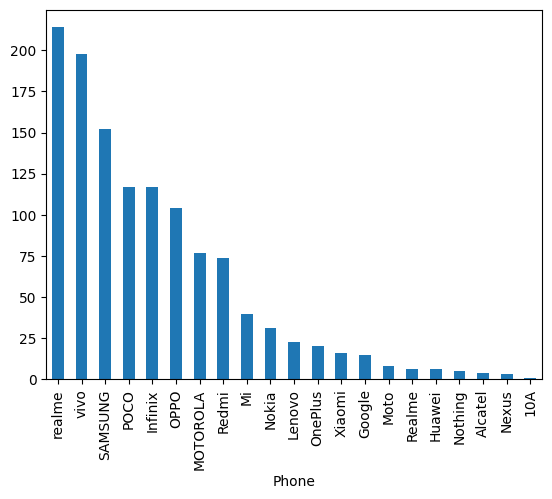

In [ ]:
df['Phone'].value_counts().plot(kind='bar')

<ipython-input-35-a0d2296dcaf3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price in INR'])


<Axes: xlabel='Price in INR', ylabel='Density'>

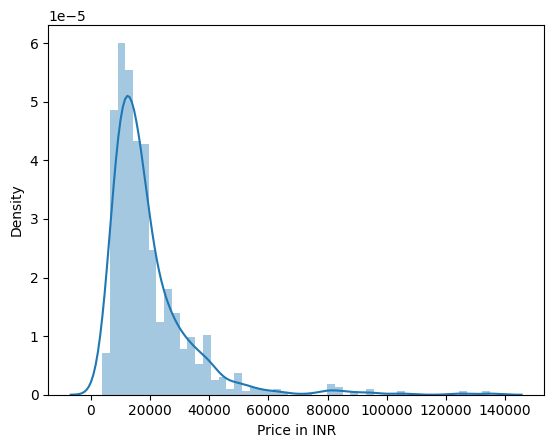

In [ ]:
sns.distplot(df['Price in INR'])

<Axes: xlabel='ROM'>

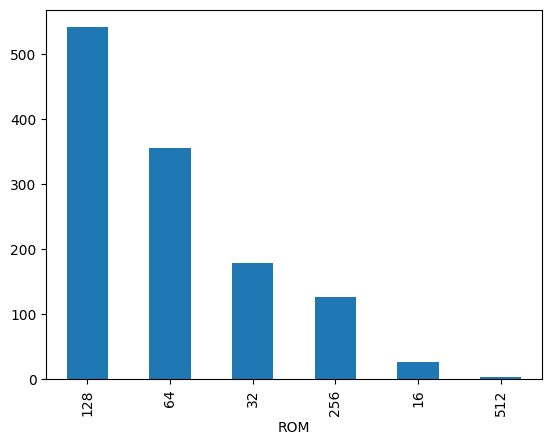

In [ ]:
df['ROM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM'>

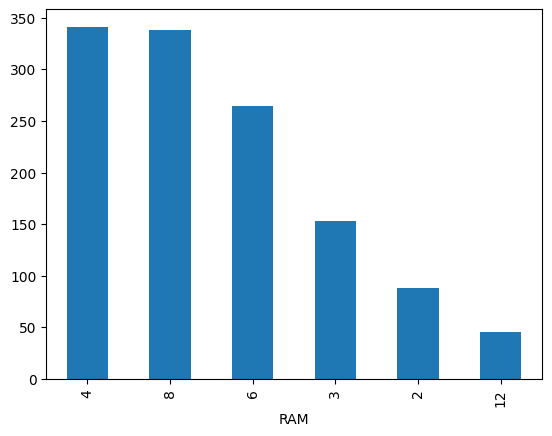

In [ ]:
df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='Upd_Processor'>

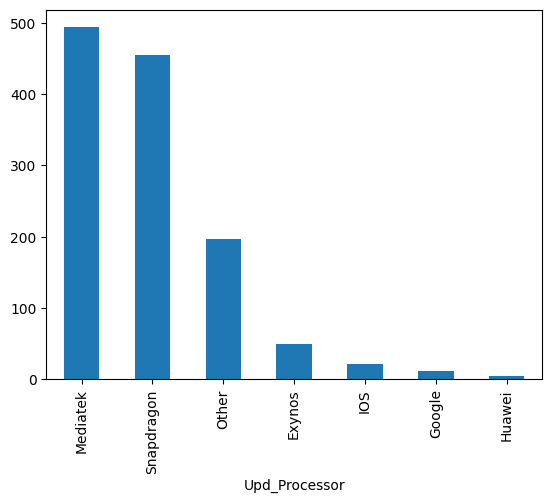

In [ ]:
df['Upd_Processor'].value_counts().plot(kind='bar')

<Axes: xlabel='Battery'>

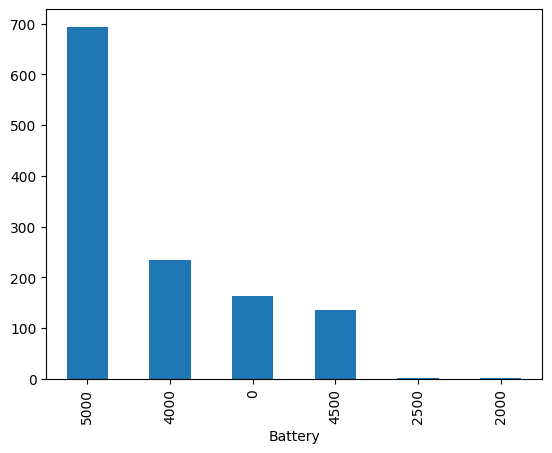

In [ ]:
df['Battery'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

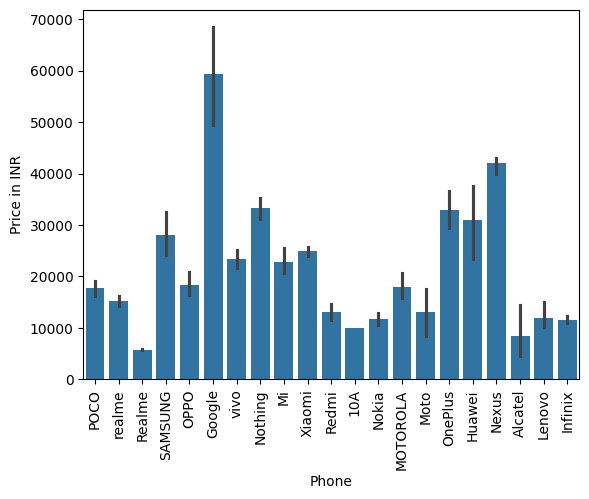

In [ ]:
sns.barplot(x=df['Phone'], y=df['Price in INR'])

plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

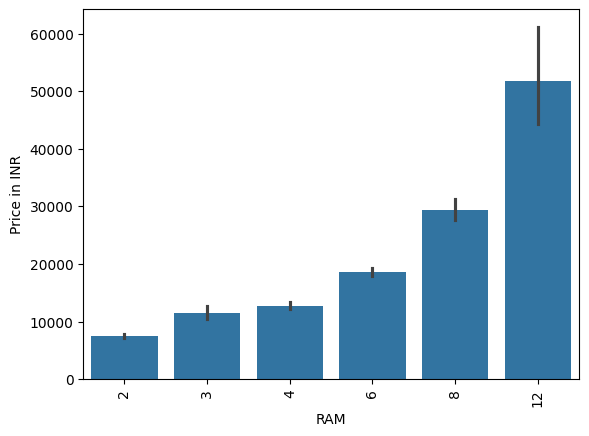

In [ ]:
sns.barplot(x=df['RAM'], y=df['Price in INR'])

plt.xticks(rotation='vertical')
plt.show

<ipython-input-42-57e30da0d569>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price in INR']))


<Axes: xlabel='Price in INR', ylabel='Density'>

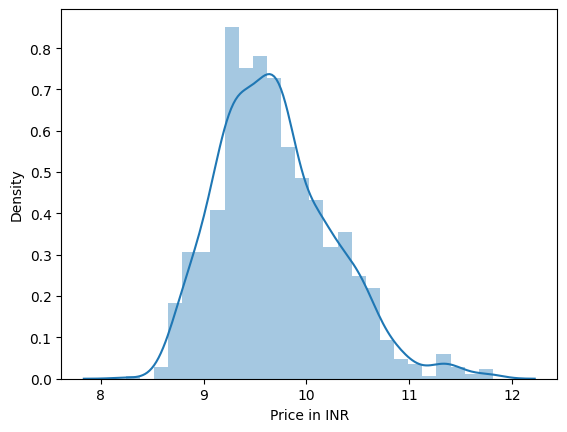

In [ ]:
sns.distplot(np.log(df['Price in INR']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1231 non-null   object 
 1   Rating             1231 non-null   float64
 2   Number of Ratings  1231 non-null   int64  
 3   RAM                1231 non-null   int64  
 4   ROM                1231 non-null   int64  
 5   Battery            1231 non-null   int64  
 6   Price in INR       1231 non-null   float64
 7   Size Cam Blkg      1231 non-null   int64  
 8   Total Cam Blkg     1231 non-null   int64  
 9   Size Cam Depan     1231 non-null   int64  
 10  Total Cam Depan    1231 non-null   int64  
 11  Upd_Processor      1231 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 125.0+ KB


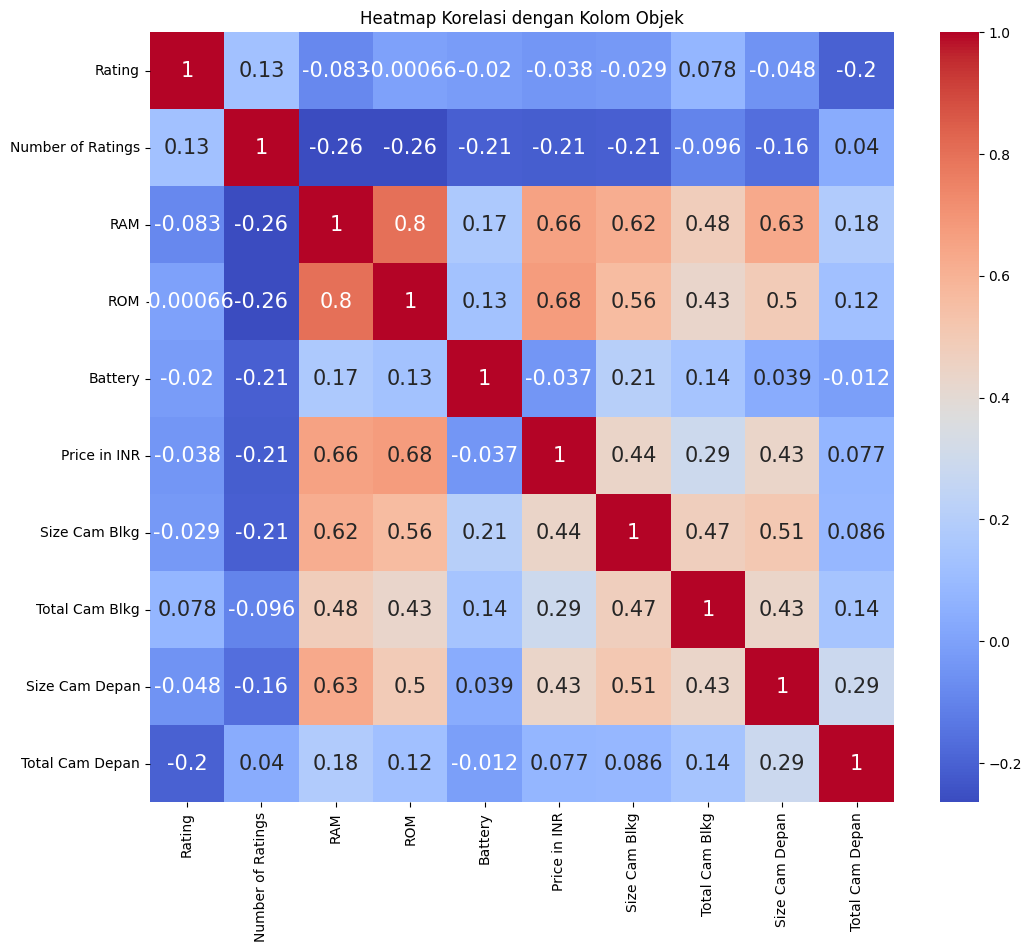

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Phone', 'Upd_Processor'], drop_first=True)

df_numerik = df_encoded.select_dtypes(include=['float64', 'int32', 'int64'])

plt.figure(figsize=(12,10))
sns.heatmap(df_numerik.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm')
plt.title('Heatmap Korelasi dengan Kolom Objek')
plt.show()

In [ ]:
df['Price in INR'] = np.log(df['Price in INR'])

df

,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan,Upd_Processor
0,POCO,4.2,33561,2,32,5000,8.639234,8,2,5,1,Mediatek
1,POCO,4.2,77128,4,64,5000,9.392579,50,2,8,1,Mediatek
2,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek
3,POCO,4.2,22621,4,64,5000,8.955319,50,2,5,1,Mediatek
4,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1832,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1833,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1834,Infinix,4.2,7117,8,128,4500,9.852142,48,4,16,2,Mediatek


<ipython-input-46-57e30da0d569>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price in INR']))


<Axes: xlabel='Price in INR', ylabel='Density'>

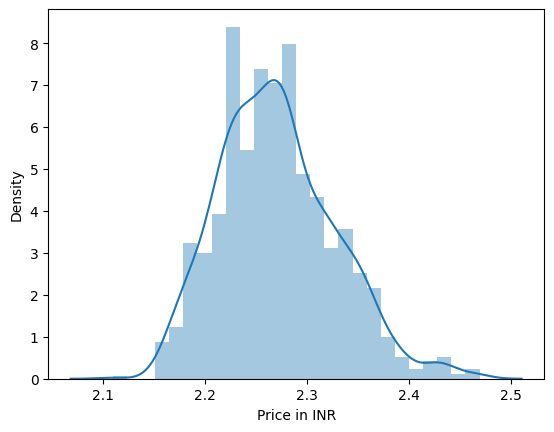

In [ ]:
sns.distplot(np.log(df['Price in INR']))

In [ ]:
df.columns

Index(['Phone', 'Rating', 'Number of Ratings', 'RAM', 'ROM', 'Battery',
       'Price in INR', 'Size Cam Blkg', 'Total Cam Blkg', 'Size Cam Depan',
       'Total Cam Depan', 'Upd_Processor'],
      dtype='object')

In [ ]:
df.head(5)

,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan,Upd_Processor
0,POCO,4.2,33561,2,32,5000,8.639234,8,2,5,1,Mediatek
1,POCO,4.2,77128,4,64,5000,9.392579,50,2,8,1,Mediatek
2,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek
3,POCO,4.2,22621,4,64,5000,8.955319,50,2,5,1,Mediatek
4,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek


In [ ]:
num_cols = ['Rating', 'Number of Ratings', 'RAM', 'ROM', 'Battery', 'Size Cam Blkg', 'Total Cam Blkg', 'Size Cam Depan',
       'Total Cam Depan']

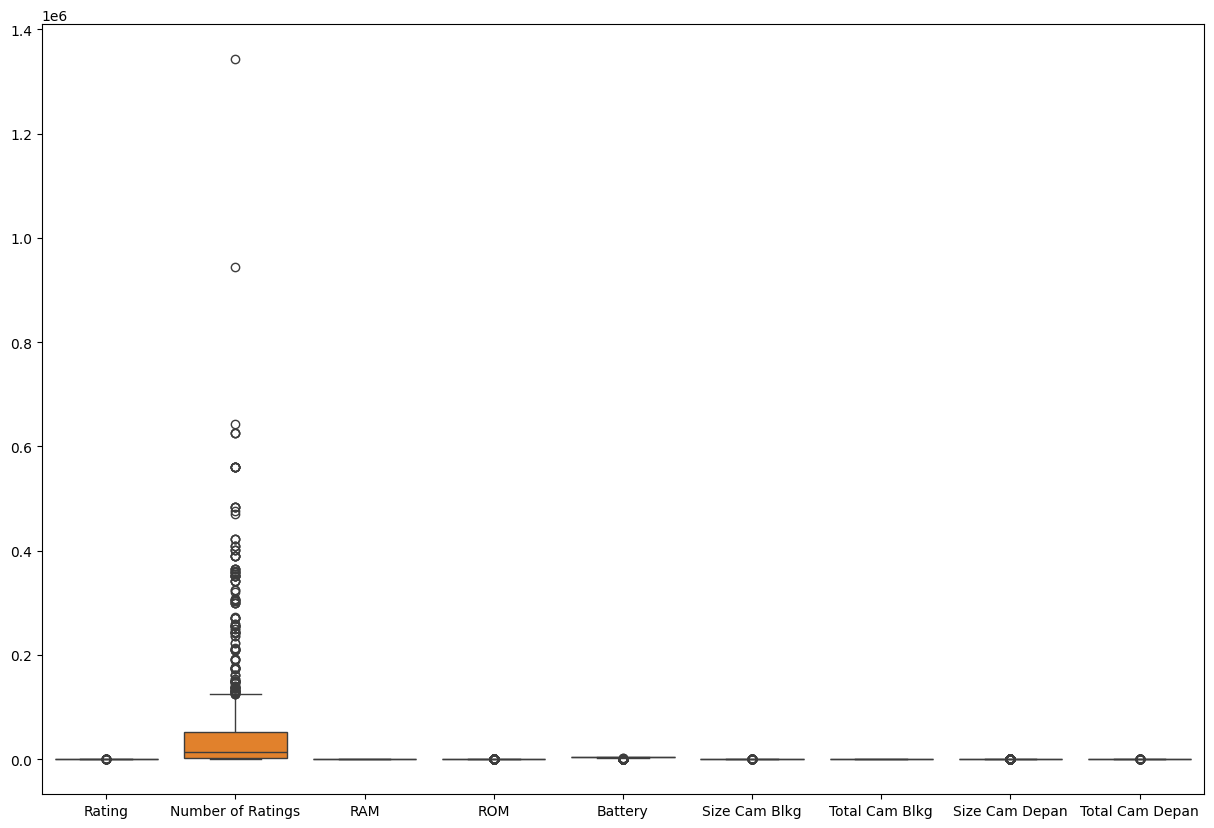

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df[num_cols])
plt.show()

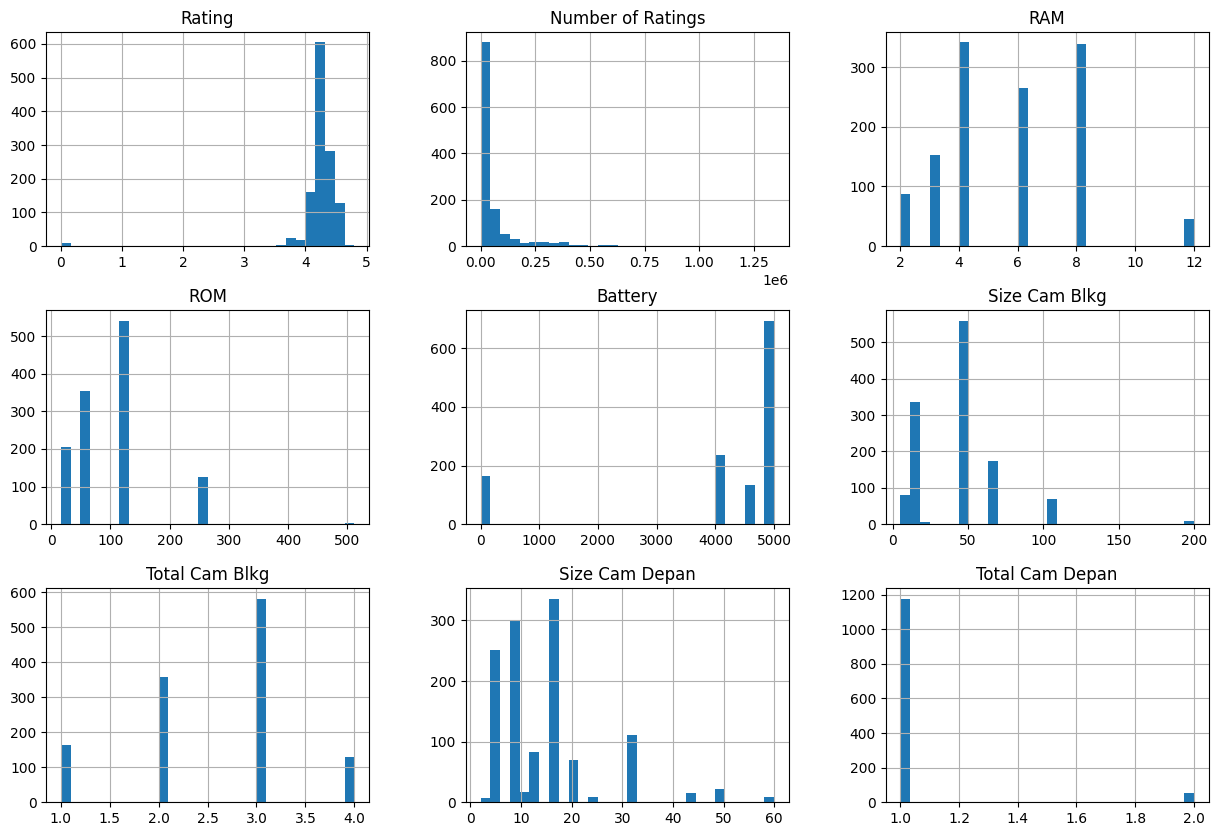

In [ ]:
df[num_cols].hist(bins=30, figsize=(15,10))
plt.show()

Reducing Outliers on Number of Ratings

<function matplotlib.pyplot.show(close=None, block=None)>

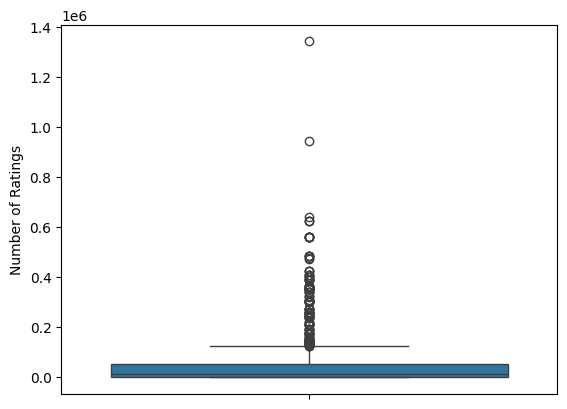

In [ ]:
sns.boxplot(df['Number of Ratings'])
plt.show

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

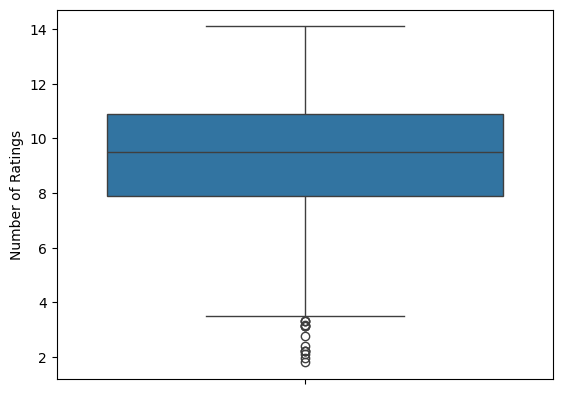

In [ ]:
df['Number of Ratings'] = np.log(df['Number of Ratings'])

sns.boxplot(df['Number of Ratings'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

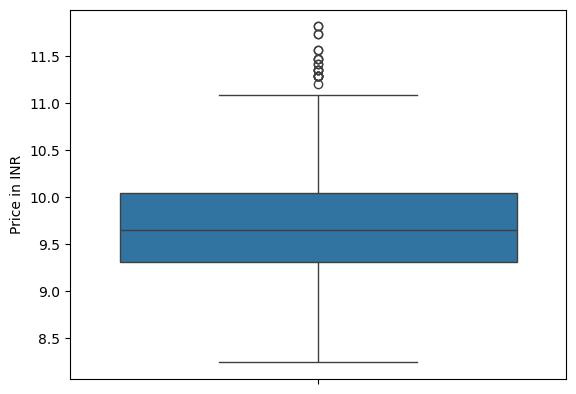

In [ ]:
sns.boxplot(df['Price in INR'])
plt.show

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price in INR', axis=1)
y = df['Price in INR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (984, 11)
X_test shape: (247, 11)
y_train shape: (984,)
y_test shape: (247,)


<ipython-input-56-6487a33ea911>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Number of Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-56-6487a33ea911>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

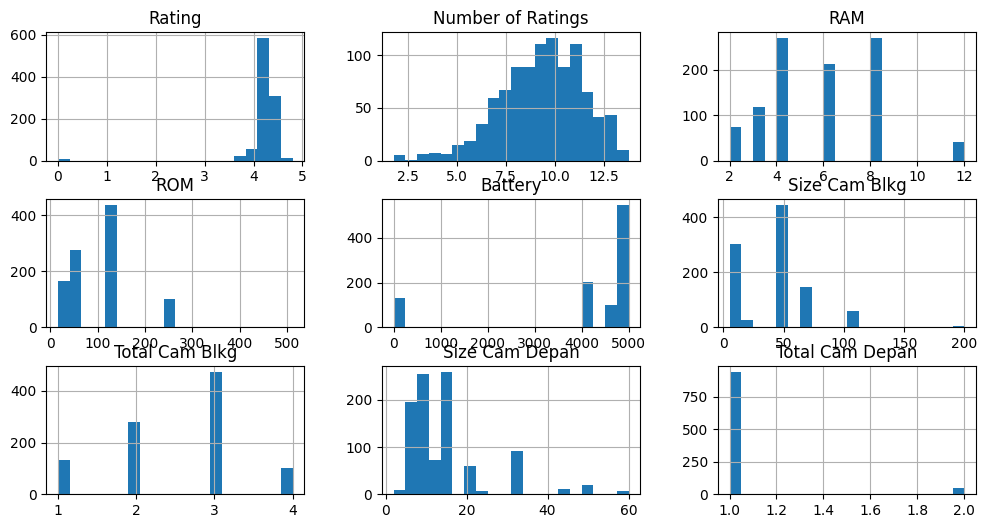

In [ ]:
X_train['Number of Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_train['Number of Ratings'].fillna(X_train['Number of Ratings'].mean(), inplace=True)

X_train[num_cols].hist(bins=20, figsize=(12,6))
plt.show()

<ipython-input-57-d4bf307ff4e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Number of Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-57-d4bf307ff4e9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

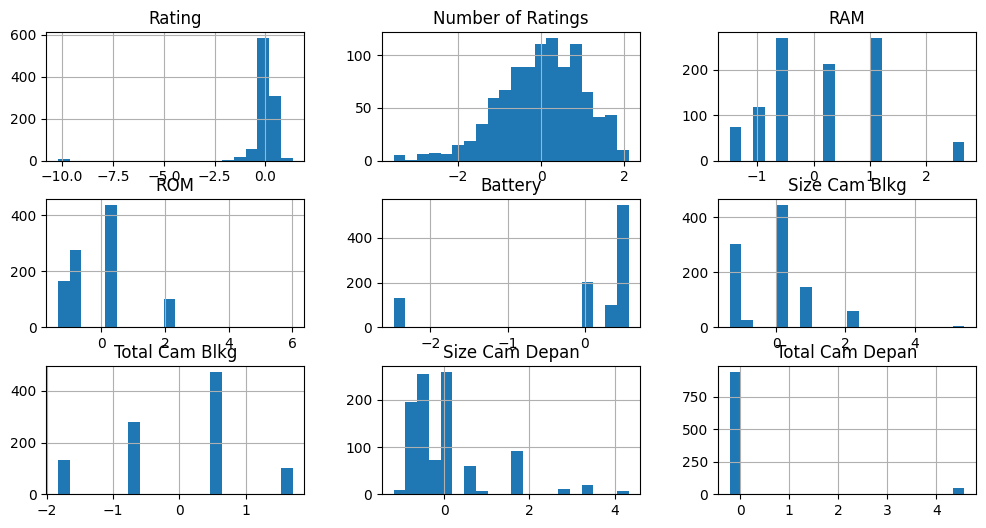

In [ ]:
X_train['Number of Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_train['Number of Ratings'].fillna(X_train['Number of Ratings'].mean(), inplace=True)

X_test['Number of Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_test['Number of Ratings'].fillna(X_test['Number of Ratings'].mean(), inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

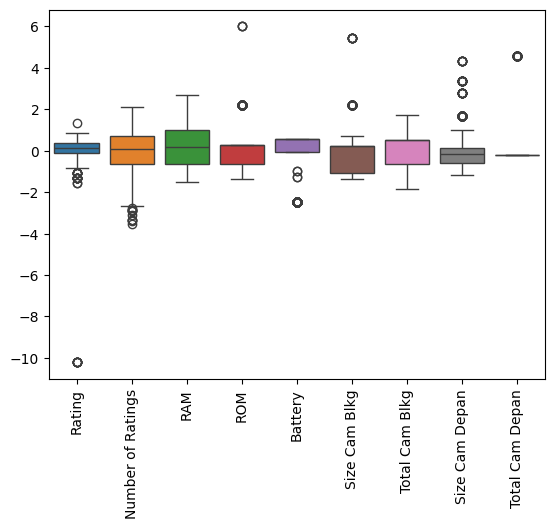

In [ ]:
sns.boxplot(data=X_train[num_cols])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_train.isna().sum() / len(X_train)


,0
Phone,0.0
Rating,0.0
Number of Ratings,0.0
RAM,0.0
ROM,0.0
Battery,0.0
Size Cam Blkg,0.0
Total Cam Blkg,0.0
Size Cam Depan,0.0
Total Cam Depan,0.0


In [ ]:
X_test.isna().sum() / len(X_test)

,0
Phone,0.0
Rating,0.0
Number of Ratings,0.0
RAM,0.0
ROM,0.0
Battery,0.0
Size Cam Blkg,0.0
Total Cam Blkg,0.0
Size Cam Depan,0.0
Total Cam Depan,0.0


In [ ]:
skew_values = []
for col in num_cols:
    skew_values.append(X_train[col].skew())

skew_values


[-8.694273501426055,
 -0.5059422788043156,
 0.5795403500569657,
 1.4352881536987283,
 -1.9128898398388872,
 1.406206363041995,
 -0.3161419185067453,
 1.7983173940642074,
 4.355733359361901]

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
Phone
realme      166
vivo        155
SAMSUNG     123
POCO         95
Infinix      92
OPPO         81
MOTOROLA     61
Redmi        60
Mi           36
Nokia        25
Lenovo       22
OnePlus      19
Google       13
Xiaomi       12
Moto          6
Alcatel       4
Huawei        4
Realme        4
Nexus         3
Nothing       2
10A           1
Name: count, dtype: int64
--------------------------------------------------
Upd_Processor
Mediatek      394
Snapdragon    370
Other         153
Exynos         38
IOS            18
Google          9
Huawei          2
Name: count, dtype: int64
--------------------------------------------------


Encoding

In [ ]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()


,Rating,Number of Ratings,RAM,ROM,Battery,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan,Phone_Alcatel,...,Phone_SAMSUNG,Phone_Xiaomi,Phone_realme,Phone_vivo,Upd_Processor_Google,Upd_Processor_Huawei,Upd_Processor_IOS,Upd_Processor_Mediatek,Upd_Processor_Other,Upd_Processor_Snapdragon
1609,0.619250,-2.116978,1.007574,0.299204,-2.476363,-0.959989,-0.652100,0.146613,-0.218914,False,...,False,False,False,False,False,False,True,False,False,False
1231,-0.103004,0.079823,0.175120,0.299204,-0.042664,0.706452,0.527434,0.146613,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True
650,-0.343756,-0.827521,0.175120,0.299204,0.565761,0.150972,1.706968,-0.138312,-0.218914,False,...,True,False,False,False,False,False,False,False,False,False
1832,0.137747,0.393855,-0.657334,-0.652063,0.565761,0.150972,1.706968,0.146613,-0.218914,False,...,False,False,False,False,False,False,False,True,False,False
1107,-0.103004,-0.477701,0.175120,0.299204,0.565761,0.706452,0.527434,0.526512,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X_train.columns

Index(['Rating', 'Number of Ratings', 'RAM', 'ROM', 'Battery', 'Size Cam Blkg',
       'Total Cam Blkg', 'Size Cam Depan', 'Total Cam Depan', 'Phone_Alcatel',
       'Phone_Google', 'Phone_Huawei', 'Phone_Infinix', 'Phone_Lenovo',
       'Phone_MOTOROLA', 'Phone_Mi', 'Phone_Moto', 'Phone_Nexus',
       'Phone_Nokia', 'Phone_Nothing', 'Phone_OPPO', 'Phone_OnePlus',
       'Phone_POCO', 'Phone_Realme', 'Phone_Redmi', 'Phone_SAMSUNG',
       'Phone_Xiaomi', 'Phone_realme', 'Phone_vivo', 'Upd_Processor_Google',
       'Upd_Processor_Huawei', 'Upd_Processor_IOS', 'Upd_Processor_Mediatek',
       'Upd_Processor_Other', 'Upd_Processor_Snapdragon'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = pd.Series(y_train, index=X_train.index)

all_unique_labels = pd.concat([y_train, y_test]).unique()
le.fit(all_unique_labels)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([216, 173, 198, 123, 180, 231,  77, 122, 172, 123, 169,  62, 203,
       241,  13, 129, 206,  23, 117,  89, 156, 153, 123,   3, 116,  55,
        89,  22, 157, 157, 168, 129, 163, 157,  26, 126, 186,  40, 276,
        99,  99, 181, 129,  95, 150, 181, 121, 116, 270, 247,  11, 123,
       186, 148,  11, 276, 209, 150, 116, 190, 107, 124, 173, 150, 186,
       263, 157,  55, 129, 273,  40,  21, 209,  76, 168, 184,  13, 211,
        66, 169,  78, 150, 116, 150,  95, 165, 126, 124,  54, 186, 140,
       139,  13,  89,  13, 163, 163,  20,  93, 150,  89,  90,  47,  93,
       209, 169, 169,  51, 107,  83,  55, 140, 241, 150, 133,  47, 264,
        55, 140,  17, 173, 110,  47,  13,  21,  89, 169, 192, 169,  47,
       258, 181, 270,  78,  95,  34, 217, 226,  11,  34,  77, 126, 140,
       241, 151, 237, 165,  78,  62, 243, 160, 169, 107, 123, 160, 139,
        90, 116, 217, 220, 196, 241,  47, 128, 264, 158, 140,  78,  41,
        40, 115, 163, 153, 126,  62,  62, 200, 116,  13, 128, 12

In [ ]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
95     37
62     32
78     32
116    32
123    30
       ..
67      1
141     1
60      1
46      1
149     1
Name: count, Length: 249, dtype: int64

Test Label 
150    10
62      9
140     8
47      7
107     7
       ..
175     1
146     1
120     1
117     1
242     1
Name: count, Length: 116, dtype: int64


In [ ]:
X_train

,Rating,Number of Ratings,RAM,ROM,Battery,Size Cam Blkg,Total Cam Blkg,Size Cam Depan,Total Cam Depan,Phone_Alcatel,...,Phone_SAMSUNG,Phone_Xiaomi,Phone_realme,Phone_vivo,Upd_Processor_Google,Upd_Processor_Huawei,Upd_Processor_IOS,Upd_Processor_Mediatek,Upd_Processor_Other,Upd_Processor_Snapdragon
1609,0.619250,-2.116978,1.007574,0.299204,-2.476363,-0.959989,-0.652100,0.146613,-0.218914,False,...,False,False,False,False,False,False,True,False,False,False
1231,-0.103004,0.079823,0.175120,0.299204,-0.042664,0.706452,0.527434,0.146613,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True
650,-0.343756,-0.827521,0.175120,0.299204,0.565761,0.150972,1.706968,-0.138312,-0.218914,False,...,True,False,False,False,False,False,False,False,False,False
1832,0.137747,0.393855,-0.657334,-0.652063,0.565761,0.150972,1.706968,0.146613,-0.218914,False,...,False,False,False,False,False,False,False,True,False,False
1107,-0.103004,-0.477701,0.175120,0.299204,0.565761,0.706452,0.527434,0.526512,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,-0.343756,-0.029529,-1.489789,-1.127696,0.565761,-1.064142,-0.652100,-0.898111,-0.218914,False,...,False,False,False,False,False,False,False,True,False,False
1696,-0.343756,0.015282,-0.657334,-0.652063,-0.042664,-0.959989,0.527434,0.146613,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True
1732,-0.103004,-0.007390,-0.657334,-0.652063,0.565761,0.220407,-0.652100,-0.613186,-0.218914,False,...,False,False,False,False,False,False,False,False,True,False
1186,0.378498,1.563838,-1.073561,-1.127696,-0.042664,0.150972,-0.652100,-0.138312,-0.218914,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# merge label with feature
X_train['Price in INR'] = y_train
X_test['Price in INR'] = y_test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 1609 to 1728
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    984 non-null    float64
 1   Number of Ratings         984 non-null    float64
 2   RAM                       984 non-null    float64
 3   ROM                       984 non-null    float64
 4   Battery                   984 non-null    float64
 5   Size Cam Blkg             984 non-null    float64
 6   Total Cam Blkg            984 non-null    float64
 7   Size Cam Depan            984 non-null    float64
 8   Total Cam Depan           984 non-null    float64
 9   Phone_Alcatel             984 non-null    bool   
 10  Phone_Google              984 non-null    bool   
 11  Phone_Huawei              984 non-null    bool   
 12  Phone_Infinix             984 non-null    bool   
 13  Phone_Lenovo              984 non-null    bool   
 14  Phone_MOTOR

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 811 to 1033
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    247 non-null    float64
 1   Number of Ratings         247 non-null    float64
 2   RAM                       247 non-null    float64
 3   ROM                       247 non-null    float64
 4   Battery                   247 non-null    float64
 5   Size Cam Blkg             247 non-null    float64
 6   Total Cam Blkg            247 non-null    float64
 7   Size Cam Depan            247 non-null    float64
 8   Total Cam Depan           247 non-null    float64
 9   Phone_Huawei              247 non-null    bool   
 10  Phone_Infinix             247 non-null    bool   
 11  Phone_Lenovo              247 non-null    bool   
 12  Phone_MOTOROLA            247 non-null    bool   
 13  Phone_Mi                  247 non-null    bool   
 14  Phone_Moto  

In [ ]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())


Train missing data: 0 
Test missing data: 0

Train duplicated data: 343 
Test duplicated data: 20


In [ ]:
X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)

In [ ]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
